In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instacart-market-basket-analysis/departments.csv.zip
/kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip
/kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip
/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip
/kaggle/input/instacart-market-basket-analysis/orders.csv.zip
/kaggle/input/instacart-market-basket-analysis/products.csv.zip
/kaggle/input/instacart-market-basket-analysis/aisles.csv.zip


In [2]:
import zipfile
import pandas as pd

# Define file paths
file_paths = {
    "departments": "/kaggle/input/instacart-market-basket-analysis/departments.csv.zip",
    "sample_submission": "/kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip",
    "order_products_train": "/kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip",
    "order_products_prior": "/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip",
    "orders": "/kaggle/input/instacart-market-basket-analysis/orders.csv.zip",
    "products": "/kaggle/input/instacart-market-basket-analysis/products.csv.zip",
    "aisles": "/kaggle/input/instacart-market-basket-analysis/aisles.csv.zip"
}

# Initialize an empty dictionary to store DataFrames
dataframes = {}

# Loop over file paths to unzip and load each CSV file into a DataFrame
for name, path in file_paths.items():
    with zipfile.ZipFile(path, 'r') as zip_ref:
        # Extract the CSV file
        zip_ref.extractall('/kaggle/working')
        csv_file = zip_ref.namelist()[0]
        
        # Load the CSV file into a DataFrame and store it in the dictionary
        dataframes[name] = pd.read_csv(f"/kaggle/working/{csv_file}")


In [3]:
# Assign each dataset to a variable
departments = dataframes["departments"]
sample_submission = dataframes["sample_submission"]
order_products_train = dataframes["order_products_train"]
order_products_prior = dataframes["order_products_prior"]
orders = dataframes["orders"]
products = dataframes["products"]
aisles = dataframes["aisles"]

In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
departments['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [13]:
len(departments['department'].unique()) # number of departments

21

In [7]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [14]:
len(orders['order_id'].unique()) # number of orders

3421083

In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [15]:
len(products['product_name'].unique()) # number of products

49688

In [11]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [16]:
len(aisles['aisle'].unique()) # number of products

134

# EDA

In [17]:
#concat train order and prior orders
prior_train_orders = pd.concat([order_products_prior, order_products_train]).sort_values(by=['order_id'])

#merge with rest
prior_train_orders = pd.merge(left = prior_train_orders, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_train_orders = pd.merge(left = prior_train_orders, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_train_orders = pd.merge(left = prior_train_orders, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_train_orders = pd.merge(left = prior_train_orders, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day',
 'days_since_prior_order']

prior_train_orders = prior_train_orders[col_order]

In [18]:
orders_count = prior_train_orders.groupby(['order_id'])['reordered'].sum().reset_index(name = 'counts')
order_with_reordered_items , order_with_no_reordered_items = sum(orders_count['counts']!=0), sum(orders_count['counts']==0)

order_with_reordered_items/prior_train_orders['order_id'].nunique() # percentage of orders with reordered items

0.8813194412690899

In [19]:
order_with_no_reordered_items/prior_train_orders['order_id'].nunique() # percentage of orders with no reordered item

0.11868055873091014

In [20]:
count_products_frequ = prior_train_orders.groupby(['product_name'])['reordered'].sum()

In [21]:
ans = count_products_frequ.reset_index(name = 'reorder_count').sort_values(by = 'reorder_count', ascending = False)

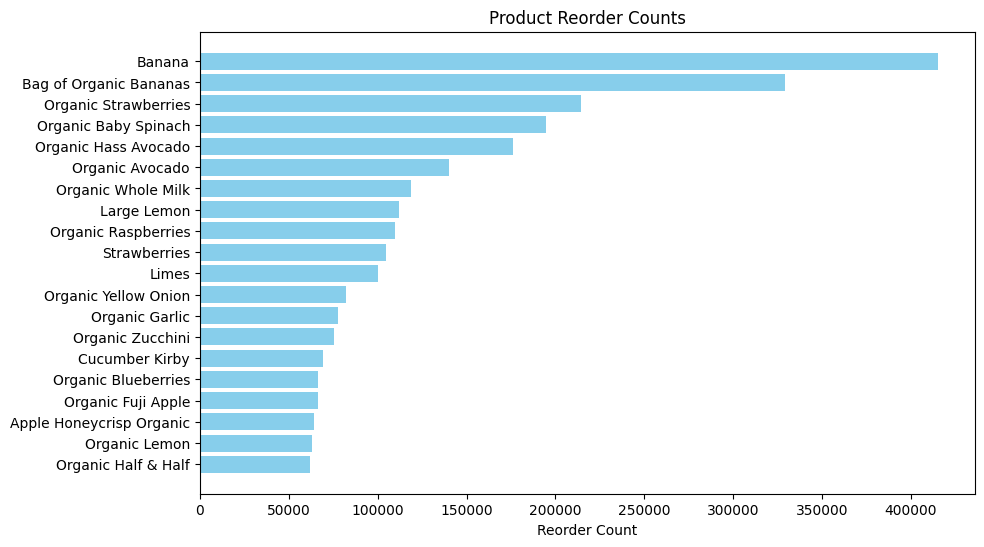

In [22]:
import matplotlib.pyplot as plt
#Product Reorder Counts
plt.figure(figsize=(10, 6))
plt.barh(ans['product_name'][:20], ans['reorder_count'][:20], color='skyblue')
plt.xlabel('Reorder Count')
plt.title('Product Reorder Counts')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest value on top
plt.show()


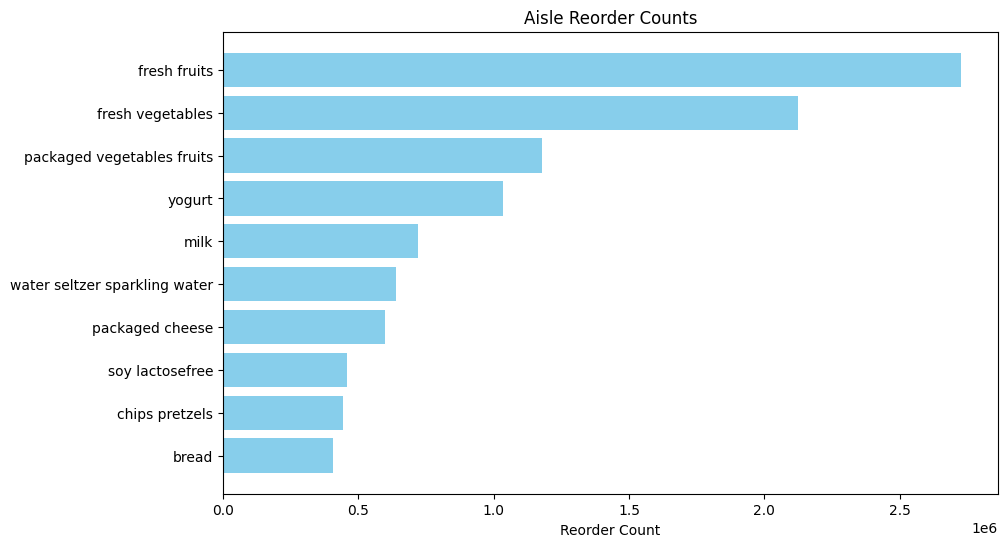

In [23]:
#Aisle Reorder Counts

count_products_frequ = prior_train_orders.groupby(['aisle'])['reordered'].sum().reset_index(name='count')
ans = count_products_frequ.sort_values(by = 'count', ascending = False)

plt.figure(figsize=(10, 6))
plt.barh(ans['aisle'][:10], ans['count'][:10], color='skyblue')
plt.xlabel('Reorder Count')
plt.title('Aisle Reorder Counts')
plt.gca().invert_yaxis()  
plt.show()


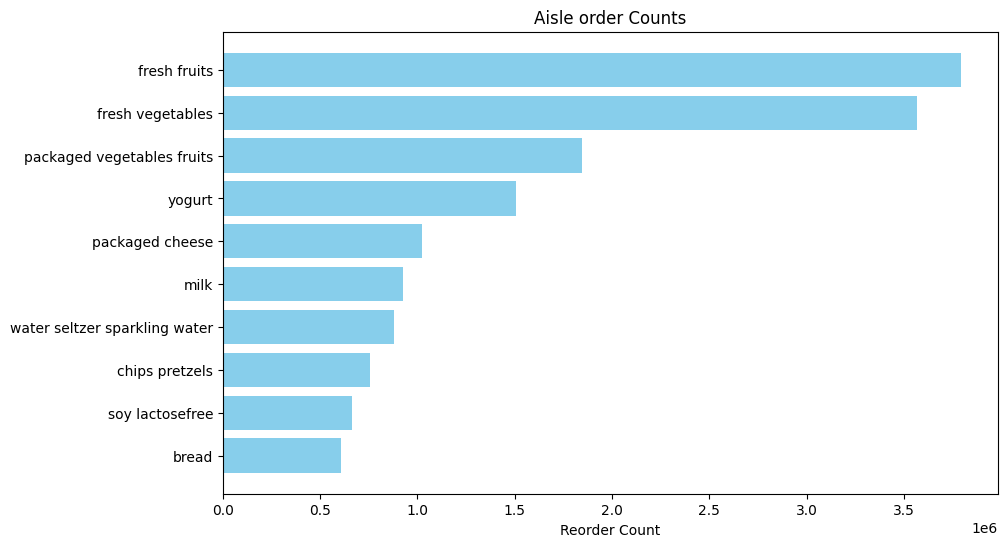

In [24]:
#Aisle order Counts
count_products_frequ = prior_train_orders.groupby(['aisle'])['order_id'].count().reset_index(name='count')
ans = count_products_frequ.sort_values(by = 'count', ascending = False)

plt.figure(figsize=(10, 6))
plt.barh(ans['aisle'][:10], ans['count'][:10], color='skyblue')
plt.xlabel('Reorder Count')
plt.title('Aisle order Counts')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest value on top
plt.show()


In [25]:
# 1. Frequently ordered products (based on total orders, regardless of reorders)
frequent_products = prior_train_orders.groupby('product_name').size().reset_index(name='total_orders')
frequent_products = frequent_products.sort_values(by='total_orders', ascending=False)

# 2. Frequently reordered products (based on number of reorders)
reordered_products = prior_train_orders[prior_train_orders['reordered'] == 1]
reordered_products = reordered_products.groupby('product_name').size().reset_index(name='reorder_count')
reordered_products = reordered_products.sort_values(by='reorder_count', ascending=False)

# 3. Frequently ordered products by aisle
frequent_aisles = prior_train_orders.groupby('aisle').size().reset_index(name='total_orders')
frequent_aisles = frequent_aisles.sort_values(by='total_orders', ascending=False)

# 4. Frequently ordered products by department
frequent_departments = prior_train_orders.groupby('department').size().reset_index(name='total_orders')
frequent_departments = frequent_departments.sort_values(by='total_orders', ascending=False)

# 5. Frequently reordered products by aisle
reordered_aisles = prior_train_orders.groupby('aisle').size().reset_index(name='reorder_count')
reordered_aisles = reordered_aisles.sort_values(by='reorder_count', ascending=False)

# 6. Frequently reordered products by department
reordered_departments = prior_train_orders.groupby('department').size().reset_index(name='reorder_count')
reordered_departments = reordered_departments.sort_values(by='reorder_count', ascending=False)


In [26]:
print("Top 10 Frequently Ordered Products:")
print(frequent_products.head(10))

Top 10 Frequently Ordered Products:
                 product_name  total_orders
3677                   Banana        491291
3472   Bag of Organic Bananas        394930
31923    Organic Strawberries        275577
28843    Organic Baby Spinach        251705
30300    Organic Hass Avocado        220877
28807         Organic Avocado        184224
22415             Large Lemon        160792
42908            Strawberries        149445
23422                   Limes        146660
32481      Organic Whole Milk        142813


In [27]:
print("\nTop 10 Frequently Reordered Products:")
print(reordered_products.head(10))



Top 10 Frequently Reordered Products:
                 product_name  reorder_count
3285                   Banana         415166
3095   Bag of Organic Bananas         329275
29270    Organic Strawberries         214448
26334    Organic Baby Spinach         194939
27718    Organic Hass Avocado         176173
26299         Organic Avocado         140270
29792      Organic Whole Milk         118684
20443             Large Lemon         112178
28741     Organic Raspberries         109688
39385            Strawberries         104588


In [28]:
print("\nTop 10 Frequently Ordered Aisles:")
print(frequent_aisles.head(10))


Top 10 Frequently Ordered Aisles:
                             aisle  total_orders
50                    fresh fruits       3792661
53                fresh vegetables       3568630
98      packaged vegetables fruits       1843806
133                         yogurt       1507583
93                 packaged cheese       1021462
83                            milk        923659
131  water seltzer sparkling water        878150
25                  chips pretzels        753739
119                soy lactosefree        664493
11                           bread        608469


In [29]:
print("\nTop 10 Frequently Ordered Departments:")
print(frequent_departments.head(10))


Top 10 Frequently Ordered Departments:
         department  total_orders
19          produce       9888378
7        dairy eggs       5631067
20           snacks       3006412
3         beverages       2804175
10           frozen       2336858
16           pantry       1956819
2            bakery       1225181
6      canned goods       1114857
8              deli       1095540
9   dry goods pasta        905340


In [30]:
print("\nTop 10 Frequently Reordered Aisles:")
print(reordered_aisles.head(10))


Top 10 Frequently Reordered Aisles:
                             aisle  reorder_count
50                    fresh fruits        3792661
53                fresh vegetables        3568630
98      packaged vegetables fruits        1843806
133                         yogurt        1507583
93                 packaged cheese        1021462
83                            milk         923659
131  water seltzer sparkling water         878150
25                  chips pretzels         753739
119                soy lactosefree         664493
11                           bread         608469


In [31]:

print("\nTop 10 Frequently Reordered Departments:")
print(reordered_departments.head(10))


Top 10 Frequently Reordered Departments:
         department  reorder_count
19          produce        9888378
7        dairy eggs        5631067
20           snacks        3006412
3         beverages        2804175
10           frozen        2336858
16           pantry        1956819
2            bakery        1225181
6      canned goods        1114857
8              deli        1095540
9   dry goods pasta         905340


## Plotting

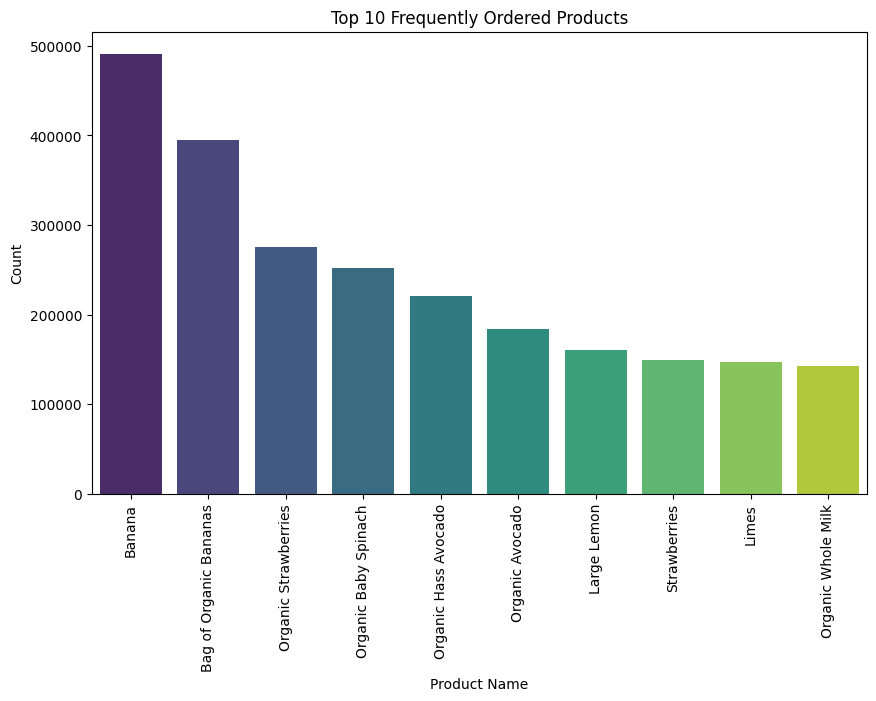

In [34]:
def plot_top_n(data, x_col, y_col, n=10, title="Top Products", xlabel="Product Name", ylabel="Count"):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data.head(n), x=x_col, y=y_col, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# 1. Plot the top 10 frequently ordered products
plot_top_n(frequent_products, 'product_name', 'total_orders', n=10, title="Top 10 Frequently Ordered Products")



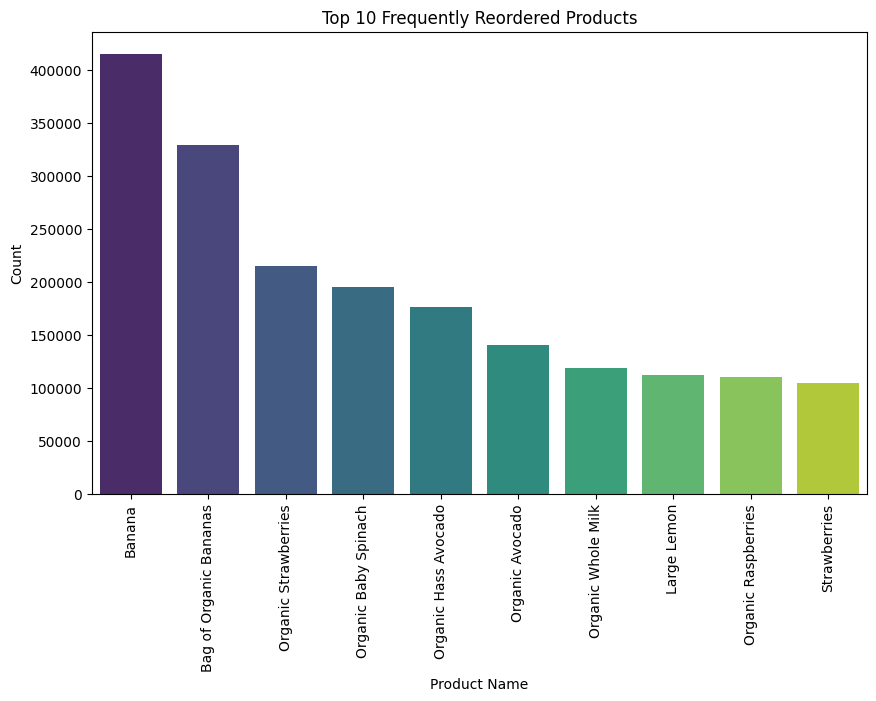

In [35]:
# 2. Plot the top 10 frequently reordered products
plot_top_n(reordered_products, 'product_name', 'reorder_count', n=10, title="Top 10 Frequently Reordered Products")


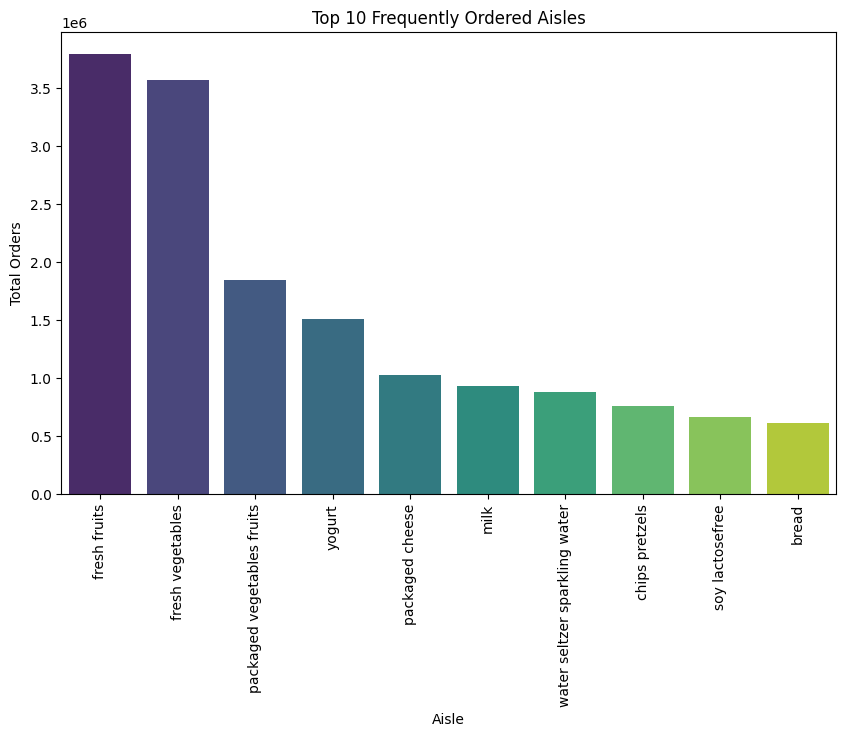

In [36]:
# 3. Plot the top 10 frequently ordered aisles
plot_top_n(frequent_aisles, 'aisle', 'total_orders', n=10, title="Top 10 Frequently Ordered Aisles", xlabel="Aisle", ylabel="Total Orders")


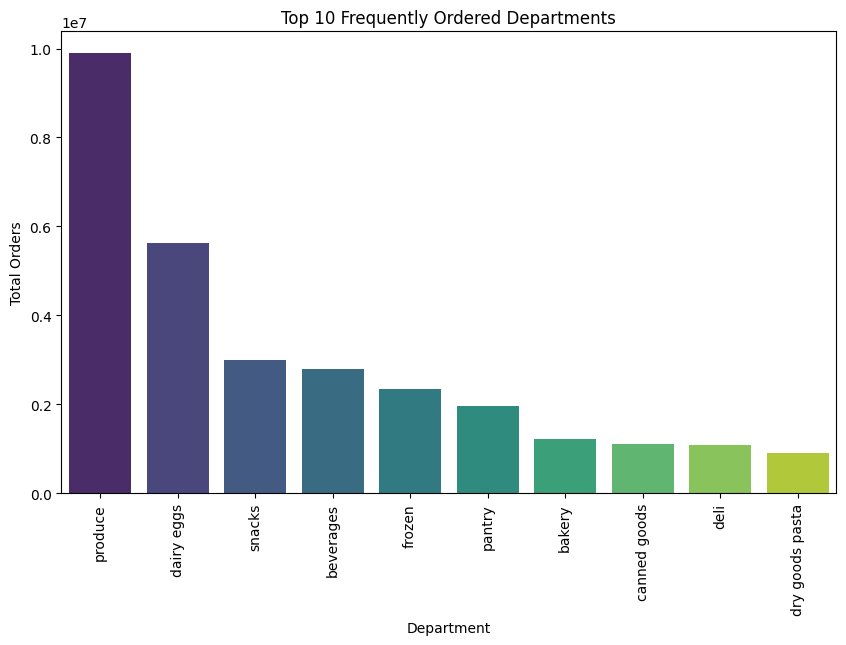

In [37]:
# 4. Plot the top 10 frequently ordered departments
plot_top_n(frequent_departments, 'department', 'total_orders', n=10, title="Top 10 Frequently Ordered Departments", xlabel="Department", ylabel="Total Orders")


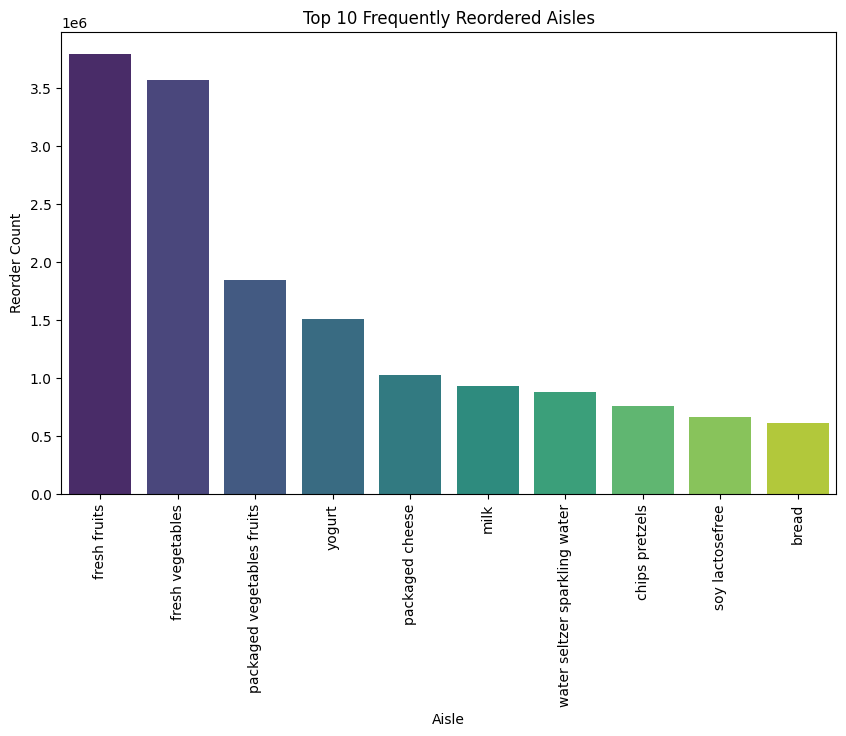

In [38]:
# 5. Plot the top 10 frequently reordered aisles
plot_top_n(reordered_aisles, 'aisle', 'reorder_count', n=10, title="Top 10 Frequently Reordered Aisles", xlabel="Aisle", ylabel="Reorder Count")


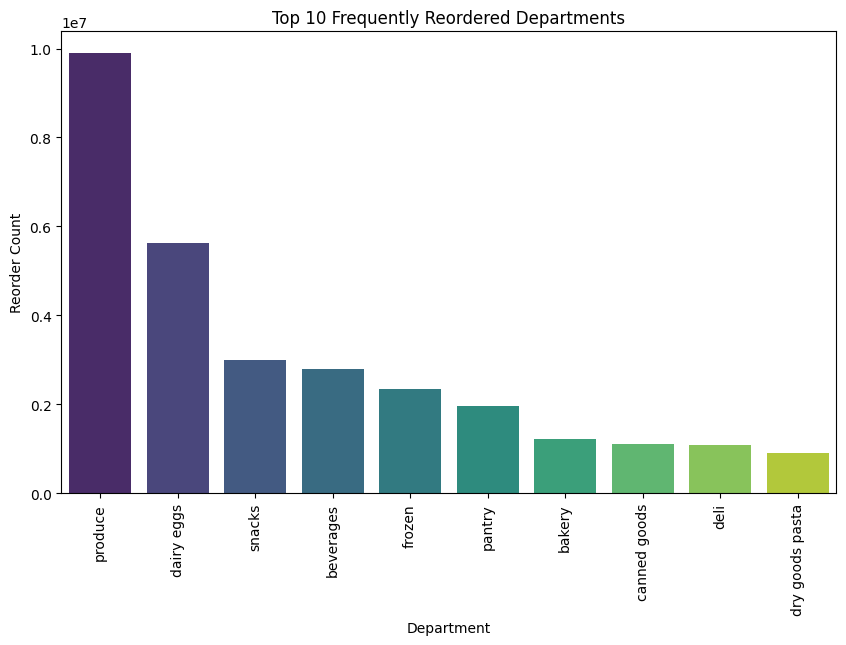

In [39]:

# 6. Plot the top 10 frequently reordered departments
plot_top_n(reordered_departments, 'department', 'reorder_count', n=10, title="Top 10 Frequently Reordered Departments", xlabel="Department", ylabel="Reorder Count")


### 2. analyzing cart size distribution using ploting

In [40]:
# 1. Calculate the cart size (number of products per order)
cart_sizes = prior_train_orders.groupby('order_id')['product_id'].count().reset_index(name='cart_size')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


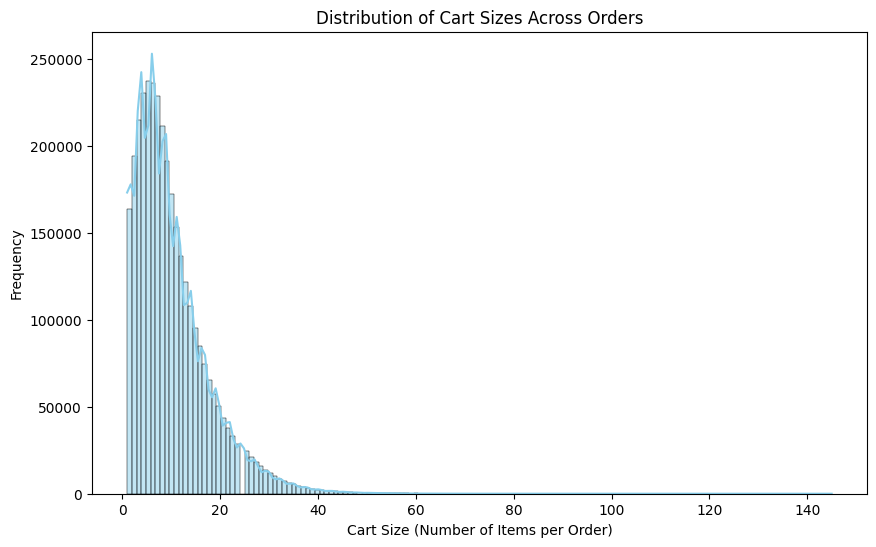

In [41]:
# Plotting Histogram to show the distribution of cart sizes
plt.figure(figsize=(10, 6))
sns.histplot(cart_sizes['cart_size'], bins=150, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Cart Sizes Across Orders')
plt.xlabel('Cart Size (Number of Items per Order)')
plt.ylabel('Frequency')
plt.show()


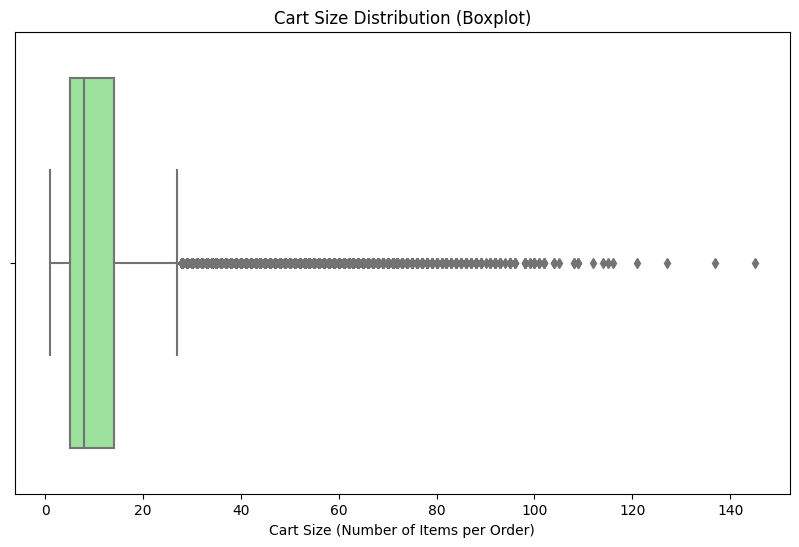

In [42]:
# Plotting a Boxplot to show the spread of cart sizes
plt.figure(figsize=(10, 6))
sns.boxplot(x=cart_sizes['cart_size'], color='lightgreen')
plt.title('Cart Size Distribution (Boxplot)')
plt.xlabel('Cart Size (Number of Items per Order)')
plt.show()

<Figure size 1000x600 with 0 Axes>

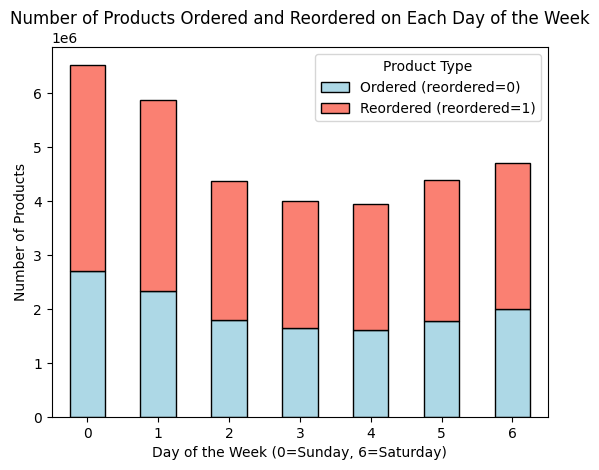

In [43]:
# 1. Group by `order_dow` and `reordered` to count how many products were ordered and reordered on each day of the week
order_day_counts = prior_train_orders.groupby(['order_dow', 'reordered']).size().reset_index(name='product_count')

# 2. Pivot the data so we can plot both ordered (reordered=0) and reordered (reordered=1) separately
order_day_counts_pivot = order_day_counts.pivot(index='order_dow', columns='reordered', values='product_count').fillna(0)

# 3. Plot the data
plt.figure(figsize=(10, 6))
order_day_counts_pivot.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], edgecolor='black')

# Add labels and title
plt.title('Number of Products Ordered and Reordered on Each Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.legend(['Ordered (reordered=0)', 'Reordered (reordered=1)'], title='Product Type')
plt.show()


<Figure size 5000x600 with 0 Axes>

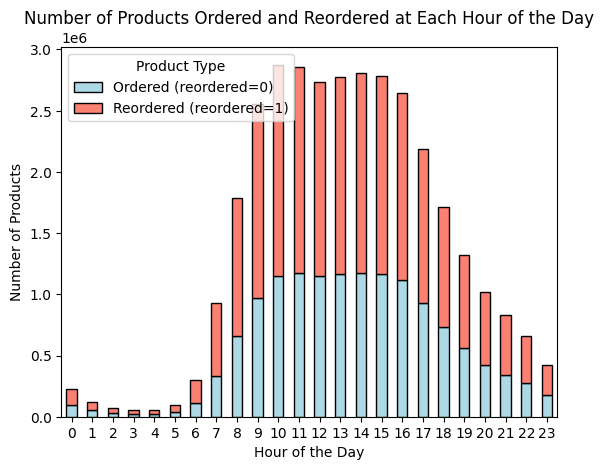

In [44]:
# 1. Group by `order_hour_of_day` and `reordered` to count how many products were ordered and reordered at each hour of the day
hourly_counts = prior_train_orders.groupby(['order_hour_of_day', 'reordered']).size().reset_index(name='product_count')

# 2. Pivot the data so we can plot both ordered (reordered=0) and reordered (reordered=1) separately
hourly_counts_pivot = hourly_counts.pivot(index='order_hour_of_day', columns='reordered', values='product_count').fillna(0)

# 3. Plot the data
plt.figure(figsize=(50, 6))
hourly_counts_pivot.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], edgecolor='black')

# Add labels and title
plt.title('Number of Products Ordered and Reordered at Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.legend(['Ordered (reordered=0)', 'Reordered (reordered=1)'], title='Product Type')
plt.show()

In [48]:
prior_train_orders

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9.0
2,112108,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9.0
3,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0
4,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,25247,3421083,11352,78,19,7,0,Organic Mini Sandwich Crackers Peanut Butter,crackers,snacks,prior,24,2,6,21.0
33819102,25247,3421083,35211,92,18,5,0,Organic Strawberry & Mango Dried Tiny Fruits,baby food formula,babies,prior,24,2,6,21.0
33819103,25247,3421083,39678,74,17,6,1,Free & Clear Natural Dishwasher Detergent,dish detergents,household,prior,24,2,6,21.0
33819104,25247,3421083,21162,92,18,3,0,Organic Mixed Berry Yogurt & Fruit Snack,baby food formula,babies,prior,24,2,6,21.0


In [52]:
# Step 1: Calculate 'days_between_orders' for each order
# Assuming `prior_train_orders` has columns 'user_id', 'order_id', and 'order_days_since_prior'
prior_train_orders['days_between_orders'] = prior_train_orders.groupby('user_id')['days_since_prior_order'].shift(-1)

# Replace NaN (for first orders) with 0
prior_train_orders['days_between_orders'] = prior_train_orders['days_between_orders'].fillna(0)


# Step 2: Calculate the average days between orders for each user
avg_days_between_orders = prior_train_orders.groupby('user_id')['days_between_orders'].mean().reset_index()

# Step 3: Classify users as weekly buyers or monthly buyers based on their average days between orders
weekly_buyers = avg_days_between_orders[avg_days_between_orders['days_between_orders'] <= 7]['user_id']
monthly_buyers = avg_days_between_orders[(avg_days_between_orders['days_between_orders'] > 7) & 
                                          (avg_days_between_orders['days_between_orders'] <= 30)]['user_id']

# Step 4: Filter the orders for weekly and monthly buyers
weekly_orders = prior_train_orders[prior_train_orders['user_id'].isin(weekly_buyers)]
monthly_orders = prior_train_orders[prior_train_orders['user_id'].isin(monthly_buyers)]

# Step 5: Get the top products bought by weekly buyers
weekly_product_counts = weekly_orders.groupby('product_name').size().reset_index(name='product_count')
weekly_product_counts = weekly_product_counts.sort_values(by='product_count', ascending=False).head(20)

# Step 6: Get the top products bought by monthly buyers
monthly_product_counts = monthly_orders.groupby('product_name').size().reset_index(name='product_count')
monthly_product_counts = monthly_product_counts.sort_values(by='product_count', ascending=False).head(20)


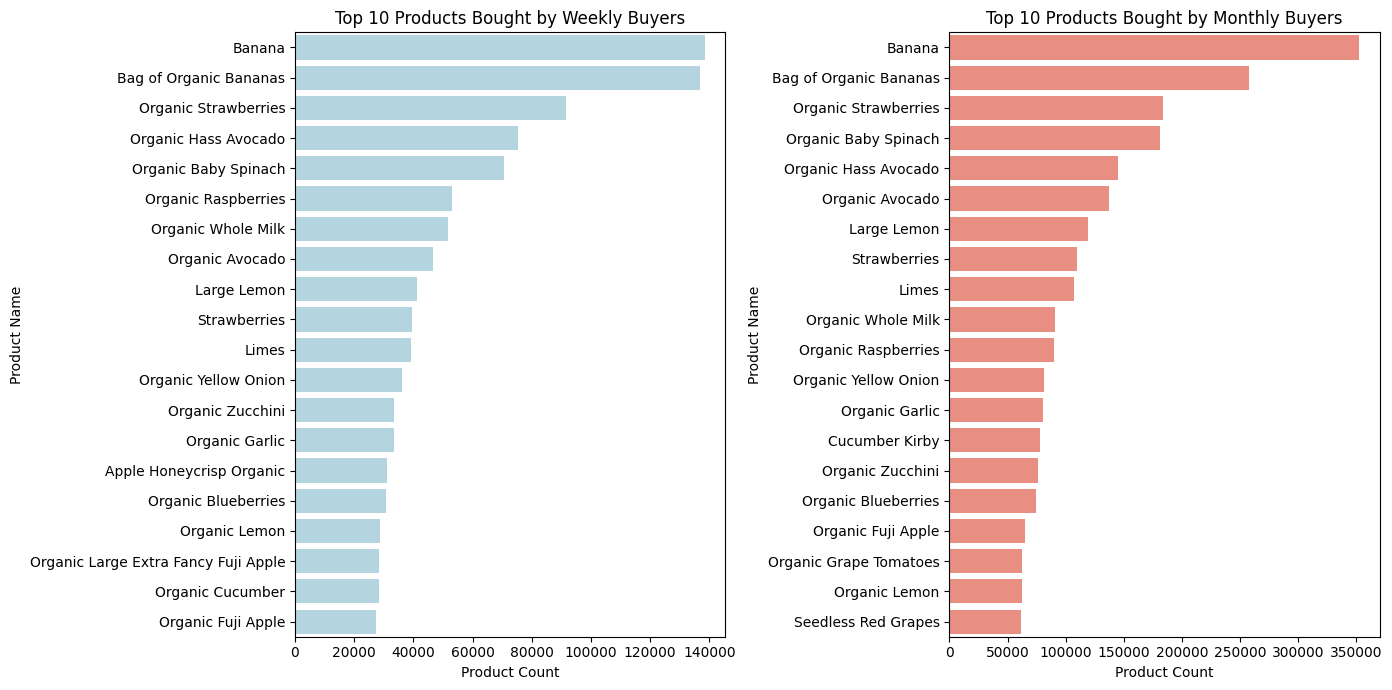

In [53]:
# Step 7: Plot the top 10 products bought by weekly and monthly buyers
plt.figure(figsize=(14, 7))

# Plot weekly buyers' top products
plt.subplot(1, 2, 1)
sns.barplot(x='product_count', y='product_name', data=weekly_product_counts, color='lightblue')
plt.title('Top 10 Products Bought by Weekly Buyers')
plt.xlabel('Product Count')
plt.ylabel('Product Name')

# Plot monthly buyers' top products
plt.subplot(1, 2, 2)
sns.barplot(x='product_count', y='product_name', data=monthly_product_counts, color='salmon')
plt.title('Top 10 Products Bought by Monthly Buyers')
plt.xlabel('Product Count')
plt.ylabel('Product Name')

plt.tight_layout()
plt.show()

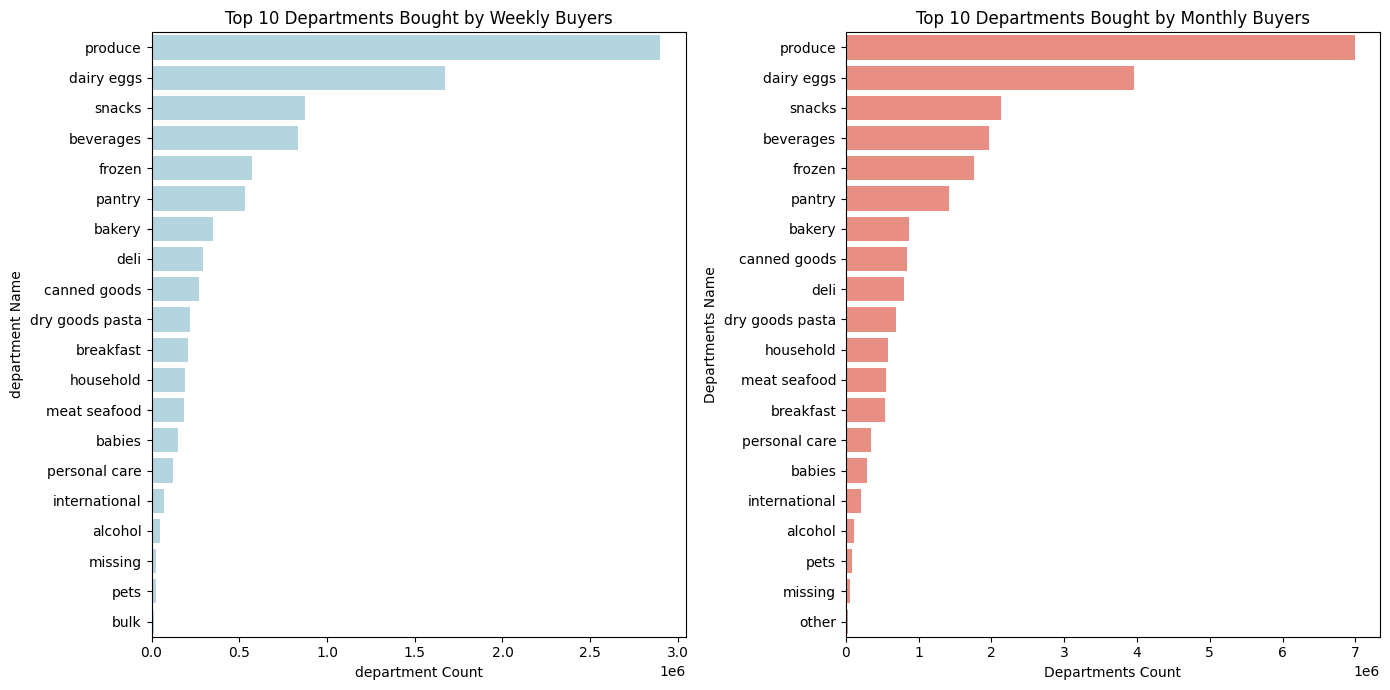

In [54]:
# Step 5: Get the top products bought by weekly buyers
weekly_product_counts = weekly_orders.groupby('department').size().reset_index(name='department_count')
weekly_product_counts = weekly_product_counts.sort_values(by='department_count', ascending=False).head(20)

# Step 6: Get the top products bought by monthly buyers
monthly_product_counts = monthly_orders.groupby('department').size().reset_index(name='department_count')
monthly_product_counts = monthly_product_counts.sort_values(by='department_count', ascending=False).head(20)

# Step 7: Plot the top 10 products bought by weekly and monthly buyers
plt.figure(figsize=(14, 7))

# Plot weekly buyers' top products
plt.subplot(1, 2, 1)
sns.barplot(x='department_count', y='department', data=weekly_product_counts, color='lightblue')
plt.title('Top 10 Departments Bought by Weekly Buyers')
plt.xlabel('department Count')
plt.ylabel('department Name')

# Plot monthly buyers' top products
plt.subplot(1, 2, 2)
sns.barplot(x='department_count', y='department', data=monthly_product_counts, color='salmon')
plt.title('Top 10 Departments Bought by Monthly Buyers')
plt.xlabel('Departments Count')
plt.ylabel('Departments Name')

plt.tight_layout()
plt.show()

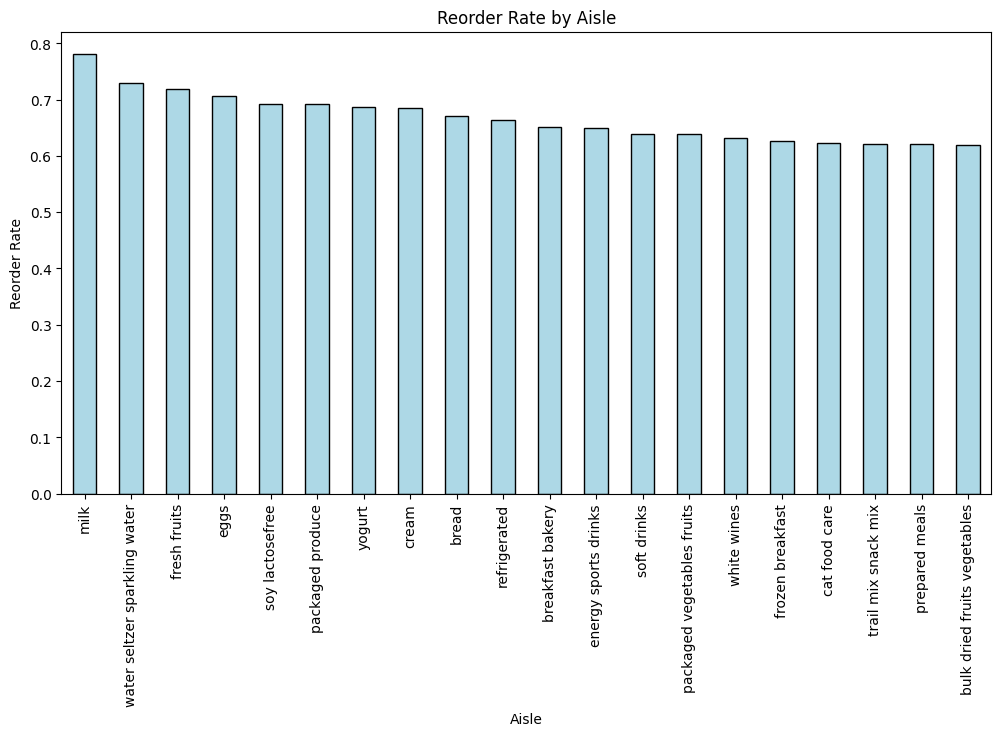

In [55]:
# Merge data with aisles and departments
product_reorder_rate = prior_train_orders.groupby(['aisle', 'reordered']).size().unstack(fill_value=0)
product_reorder_rate['reorder_rate'] = product_reorder_rate[1] / (product_reorder_rate[0] + product_reorder_rate[1])

# Plot average reorder rate by aisle
plt.figure(figsize=(12, 6))
product_reorder_rate['reorder_rate'].sort_values(ascending=False).head(20).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Reorder Rate by Aisle')
plt.xlabel('Aisle')
plt.ylabel('Reorder Rate')
plt.xticks(rotation=90)
plt.show()


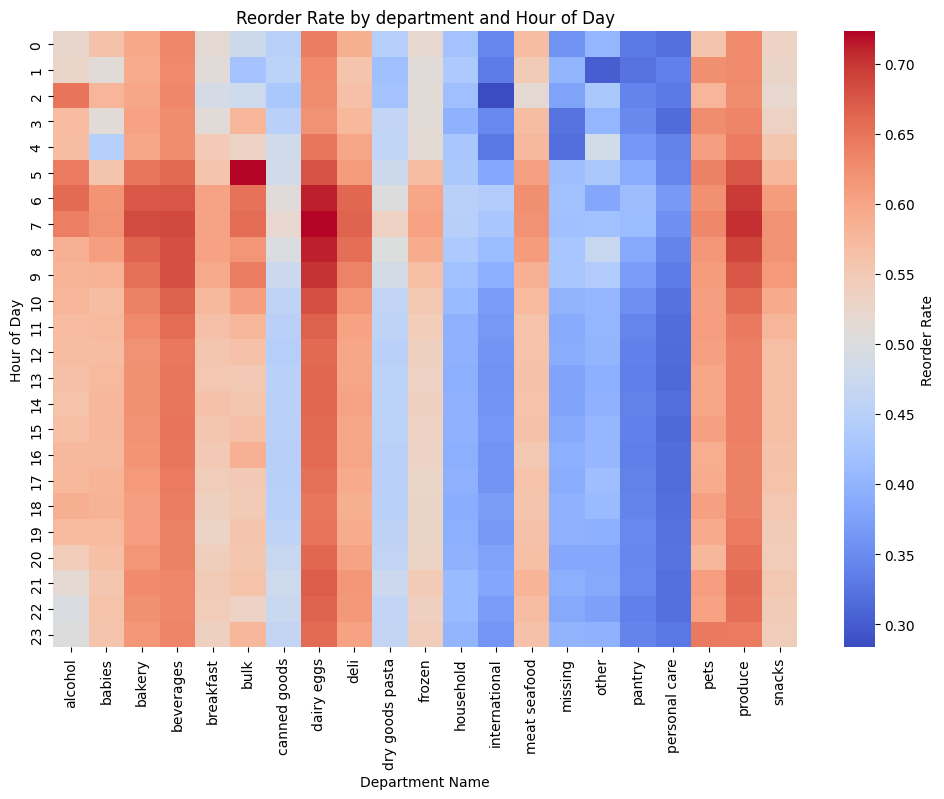

In [56]:
# Calculate reorder rate for each product at each hour of day
reorder_hourly = prior_train_orders.groupby(['order_hour_of_day', 'department'])['reordered'].mean().unstack().fillna(0)

# Plot heatmap of reorder rates for each product by hour of day
plt.figure(figsize=(12, 8))
sns.heatmap(reorder_hourly, cmap='coolwarm', cbar_kws={'label': 'Reorder Rate'})
plt.title('Reorder Rate by department and Hour of Day')
plt.xlabel('Department Name')
plt.ylabel('Hour of Day')
plt.xticks(rotation=90)
plt.show()


# Feature Engineering

## Product only Features

In [4]:
# create empty empty dataframe
product_features = pd.DataFrame(columns = ['product_id'])

#add products
product_features['product_id'] = order_products_prior['product_id'].sort_values().unique()

#get reorder rate for each product
order_products_prior.groupby('product_id').agg({'reordered':['sum','count']}).reset_index()
product_features = order_products_prior.groupby('product_id').agg({'reordered': ['sum', 'count']}).reset_index()
product_features.columns = ['product_id', 'reordered_sum', 'reordered_count']

# Calculate reorder rate
product_features['reorder_rate'] = product_features['reordered_sum'] / product_features['reordered_count']

product_features
product_features[product_features['reorder_rate']==0] # 4372 products were never reordered

# we got the first feature we need
product_features.drop(columns=['reordered_sum', 'reordered_count'], inplace=True)
# product_features
#get mean position of product in the cart, sort by product_name and add to feat_2 of product_features
pre = order_products_prior.groupby('product_id').agg({'add_to_cart_order':['mean']}).reset_index()
pre.columns = ['product_id', 'mean_pos_in_cart']
product_features = product_features.merge(pre, on='product_id', how='right')

products = products.merge(departments, on='department_id', how='left')

products['organic'] = products['product_name'].apply(lambda x: 'organic' in x.lower()).astype(int)
products['isYogurt'] = products['aisle_id'].apply(lambda x: x==120).astype(int)
products['isProduce'] = products['department_id'].apply(lambda x: x==4).astype(int)
products['isFrozen'] = products['department_id'].apply(lambda x: x==1).astype(int)
products['isdairy'] = products['department_id'].apply(lambda x: x==16).astype(int)
products['isbreakfast'] = products['department_id'].apply(lambda x: x==14).astype(int)
products['issnack'] = products['department_id'].apply(lambda x: x==19).astype(int)
products['isbeverage'] = products['department_id'].apply(lambda x: x==7).astype(int)
new_product_feat = products[['organic', 'isYogurt', 'isProduce', 'isFrozen', 'isdairy', 'isbreakfast', 'issnack', 'isbeverage']]
#reduce sparsity using NMF
#ref:https://www.kaggle.com/themissingsock/matrix-decomposition-with-buyer-data
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

nmf = NMF(n_components = 3)
model = nmf.fit(new_product_feat)
W = model.transform(new_product_feat)
prod_data = pd.DataFrame(normalize(W))

prod_data.columns = ['p_reduced_feat_1', 'p_reduced_feat_2','p_reduced_feat_3']
products.drop(['organic', 'isYogurt', 'isProduce', 'isFrozen', 'isdairy', 'isbreakfast', 'issnack', 'isbeverage'], axis = 1, inplace =True)

product_features['p_reduced_feat_1'] = prod_data['p_reduced_feat_1']
product_features['p_reduced_feat_2'] = prod_data['p_reduced_feat_2']
product_features['p_reduced_feat_3'] = prod_data['p_reduced_feat_3']

#Get aisle reorder rate
order_products_prior = order_products_prior.merge(products, on='product_id', how='left')
aisle_features = order_products_prior.groupby('aisle_id').agg({'reordered': ['sum', 'count']}).reset_index()
aisle_features.columns = ['aisle_id', 'reordered_sum', 'reordered_count']
aisle_features['aisle_reorder_rate'] = aisle_features['reordered_sum'] / aisle_features['reordered_count']
aisle_features.drop(columns=['reordered_sum', 'reordered_count'], inplace=True)

new_df = pd.merge(order_products_prior, aisle_features, on = 'aisle_id')
#Get department reorder rate
department_features = order_products_prior.groupby('department_id').agg({'reordered': ['sum', 'count']}).reset_index()
department_features.columns = ['department_id', 'reordered_sum', 'reordered_count']
department_features['dept_reorder_rate'] = department_features['reordered_sum'] / department_features['reordered_count']
new_df = pd.merge(new_df, department_features, on = 'department_id')


new_df
new_df = new_df[['product_id','aisle_id','department_id','aisle_reorder_rate','dept_reorder_rate']]
new_df.drop_duplicates(keep='first', inplace = True)
#merge dept_reorder_rate and aisle_reorder_rate to existing product features
product_features = pd.merge(product_features, new_df , on='product_id', how = 'inner')
del new_df, new_product_feat, model, prod_data

product_features



,product_id,reorder_rate,mean_pos_in_cart,p_reduced_feat_1,p_reduced_feat_2,p_reduced_feat_3,aisle_id,department_id,aisle_reorder_rate,dept_reorder_rate
0,1,0.613391,5.801836,1.0,0.0,0.0,61,19,0.548698,0.574180
1,2,0.133333,9.888889,0.0,0.0,0.0,104,13,0.152391,0.346721
2,3,0.732852,6.415162,0.0,0.0,1.0,94,7,0.527615,0.653460
3,4,0.446809,9.507599,0.0,1.0,0.0,38,1,0.556655,0.541885
4,5,0.600000,6.466667,0.0,0.0,0.0,5,13,0.280627,0.346721
...,...,...,...,...,...,...,...,...,...,...
49672,49684,0.111111,4.333333,0.0,1.0,0.0,124,5,0.572344,0.569924
49673,49685,0.122449,9.571429,0.0,1.0,0.0,42,1,0.542171,0.541885
49674,49686,0.700000,7.500000,0.0,0.0,1.0,112,3,0.670168,0.628141
49675,49687,0.461538,7.538462,0.0,0.0,1.0,41,8,0.620883,0.601285


## user only features

In [5]:
user_features = pd.DataFrame(columns = ['user_id'])
user_features['user_id'] = orders['user_id'].sort_values().unique()

# feat_1: user_reorder_rate : Average reorder rate on orders placed?
order_products_prior = order_products_prior.merge(orders, on='order_id', how='left')
user_features = order_products_prior.groupby('user_id').agg({'reordered': ['sum', 'count']}).reset_index()
user_features.columns = ['user_id', 'sum_reordered', 'count_reordered']
user_features['user_reorder_rate'] = user_features['sum_reordered'] / user_features['count_reordered']
user_features.drop(columns=['sum_reordered', 'count_reordered'], inplace=True)
user_features
# feat_2 : user_unique_products           : Distinct Products ordered ?
user_unique_products = order_products_prior.groupby('user_id')['product_id'].nunique().reset_index()
user_unique_products.columns = ['user_id', 'user_unique_products_count']
user_unique_products
user_features = user_features.merge(user_unique_products, on='user_id', how='left')
user_features
#feat_3 : user_total_products: Total products ordered ?
user_total_products = order_products_prior.groupby('user_id').agg({'product_id': ['count']}).reset_index()
user_total_products.columns = ['user_id', 'user_total_products_count']
user_total_products
user_features = user_features.merge(user_total_products, on='user_id', how='left')
user_features
# feat_4 : user_avg_cart_size: mean Products per order ? = average cart size ?
user_avg_cart_size = order_products_prior.groupby('user_id').agg({'add_to_cart_order': ['mean']}).reset_index()
user_avg_cart_size.columns = ['user_id', 'user_avg_cart_size']
user_avg_cart_size
user_features = user_features.merge(user_avg_cart_size, on='user_id', how='left')
user_features
# feat_5 : user_avg_days_between_orders   : Average days between orders ?
user_avg_days_between_orders = orders.groupby('user_id').agg({'days_since_prior_order': ['mean']}).reset_index()
user_avg_days_between_orders.columns = ['user_id', 'user_avg_days_between_orders']
user_avg_days_between_orders
user_features = user_features.merge(user_avg_days_between_orders, on='user_id', how='left')
user_features
# feat_6 : user_reordered_products_ratio: user product reorder ratio
#get user product reorder ratio
# number of unique products reordered / number of unique products ordered
df = pd.DataFrame(columns = ['user_id'])
df['user_id'] = orders['user_id'].sort_values().unique()
df['user_unique_products'] = order_products_prior.groupby(["user_id"])['product_id'].nunique().reset_index(name = 'unique')['unique']
df['user_reordered_products'] = order_products_prior[order_products_prior['reordered']==1].groupby(["user_id"])['product_id'].nunique().reset_index(name = 'reordered_unique')['reordered_unique']
df.fillna(0, inplace = True)
user_features['user_reordered_products_ratio'] = df['user_reordered_products'] / df['user_unique_products']
user_features

,user_id,user_reorder_rate,user_unique_products_count,user_total_products_count,user_avg_cart_size,user_avg_days_between_orders,user_reordered_products_ratio
0,1,0.694915,18,59,3.627119,19.000000,0.555556
1,2,0.476923,102,195,8.553846,16.285714,0.362745
2,3,0.625000,33,88,4.443182,12.000000,0.575758
3,4,0.055556,17,18,2.777778,17.000000,0.058824
4,5,0.378378,23,37,5.513514,11.500000,0.347826
...,...,...,...,...,...,...,...
206204,206205,0.250000,24,32,6.781250,16.666667,0.000000
206205,206206,0.473684,150,285,3.835088,3.716418,0.000000
206206,206207,0.587444,92,223,8.695067,14.312500,0.000000
206207,206208,0.707533,198,677,8.516987,7.367347,0.000000


## user product only features

In [6]:
#create an empty dataframe
user_product_features = pd.DataFrame(columns=['user_id','product_id'])


#get unique user-product pairs ( total data is reduced by 60 %)
    #prior_train_orders.groupby(["user_id","product_id"]).size().shape[0]/prior_train_orders.shape[0]  - 0.409
    #add user and product to dataframe

u_p = order_products_prior.groupby(["user_id","product_id"]).size().reset_index()
user_product_features["user_id"] = u_p["user_id"]
user_product_features["product_id"] = u_p["product_id"]
#How frequently user ordered the product ?
#times user ordered the product/ #times user placed an order

df = order_products_prior.groupby(["user_id","product_id"])["reordered"].size()
df = df/order_products_prior.groupby(["user_id"]).size()
df = df.reset_index(name = 'order_rate')
df.fillna(0. , inplace = True)
user_product_features["u_p_order_rate"] = df["order_rate"]

#How frequently user reordered the product ?
#times user reordered the product/ #times user ordered the product

df = order_products_prior[order_products_prior["reordered"]==1].groupby(["user_id","product_id"])["reordered"].size()
df = df/order_products_prior.groupby(["user_id","product_id"]).size()
df = df.reset_index(name = 'reorder_rate')
df.fillna(0. , inplace = True)
user_product_features["u_p_reorder_rate"] = df["reorder_rate"]

#Average position of product in the cart on orders placed by user ?

df = order_products_prior.groupby(["user_id","product_id"])['add_to_cart_order'].mean().reset_index(name = 'mean_position')
user_product_features['u_p_avg_position'] = df['mean_position']
user_product_features
# Number of orders placed since the product was last ordered ?
# Get last order_number placed by user , subtract with last order_number with the product in cart

df = order_products_prior.groupby(["user_id","product_id"])['order_number'].max().reset_index()

df_2 = order_products_prior.groupby(["user_id"])['order_number'].max().reset_index()

new_df = pd.merge(df, df_2,  how='outer', left_on=['user_id'], right_on = ['user_id'])

new_df['order_diff'] = new_df['order_number_y'] - new_df['order_number_x']

user_product_features['u_p_orders_since_last'] = new_df['order_diff']

user_product_features


,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last
0,1,196,0.169492,0.900000,1.400000,0
1,1,10258,0.152542,0.888889,3.333333,0
2,1,10326,0.016949,0.000000,5.000000,5
3,1,12427,0.169492,0.900000,3.300000,0
4,1,13032,0.050847,0.666667,6.333333,0
...,...,...,...,...,...,...
13307948,206209,43961,0.023256,0.666667,8.000000,1
13307949,206209,44325,0.007752,0.000000,8.000000,6
13307950,206209,48370,0.007752,0.000000,8.000000,2
13307951,206209,48697,0.007752,0.000000,6.000000,6


In [11]:
merged_df = pd.merge(user_product_features, user_features,  how='outer', left_on=['user_id'], right_on = ['user_id'])
merged_df = pd.merge(merged_df, product_features,  how='outer', left_on=['product_id'], right_on = ['product_id'])

## create training dataset

In [12]:
train_order_data = pd.merge(order_products_train, orders, on='order_id', how='left')
upd_train_orders = train_order_data[['user_id','order_id','product_id','reordered']]
last_orders = upd_train_orders.groupby(['user_id'])['order_id'].max().reset_index(name = 'new_order_id')
order_details = train_order_data[['order_id','order_dow','order_hour_of_day','days_since_prior_order']]
order_details = order_details.drop_duplicates()

#merge latest orders (prior_last_orders) with above user and product feat

train_orders_merged_df = pd.merge(merged_df, upd_train_orders,  how='left', left_on=['user_id','product_id'], right_on = ['user_id','product_id'])
train_orders_merged_df = pd.merge(train_orders_merged_df, last_orders, on = 'user_id')
train_orders_merged_df.drop("order_id", axis = 1, inplace = True)
train_orders_merged_df.rename(columns = {'new_order_id':'order_id'}, inplace = True) 
train_orders_merged_df = pd.merge(train_orders_merged_df, order_details, on = 'order_id')
train_orders_merged_df[['reordered']]= train_orders_merged_df[['reordered']].fillna(value=0.0)


## reduce size of the dataset

In [13]:
# Function to reduce memory usage by changing dtypes
def reduce_memory_usage(df):
    # Iterate over each column to check data types
    start_mem = df.memory_usage().sum() / 1024**2  # In MB
    print(f'Memory usage before optimization: {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype

        if col_type == 'int64':
            # For integers, downcast to the smallest possible integer type
            if df[col].max() < 2**8:
                df[col] = df[col].astype('uint8')
            elif df[col].max() < 2**16:
                df[col] = df[col].astype('uint16')
            elif df[col].max() < 2**32:
                df[col] = df[col].astype('uint32')
            else:
                df[col] = df[col].astype('uint64')

        elif col_type == 'float64':
            # For floats, downcast to float32 or float16
            df[col] = df[col].astype('float32')

        elif col_type == 'object':
            # For object columns, try converting them to 'category' dtype (for categorical data)
            df[col] = df[col].astype('category')

        elif col_type == 'bool':
            # For boolean columns, convert to boolean if not already
            df[col] = df[col].astype('bool')

    end_mem = df.memory_usage().sum() / 1024**2  # In MB
    print(f'Memory usage after optimization: {end_mem:.2f} MB')
    print(f'Reduced memory usage by: {100 * (start_mem - end_mem) / start_mem:.1f}%')

    return df
    
# Reducing memory usage of the dataframe
train_orders_merged_df = reduce_memory_usage(train_orders_merged_df)

Memory usage before optimization: 1681.07 MB
Memory usage after optimization: 670.81 MB
Reduced memory usage by: 60.1%


In [65]:
train_orders_merged_df.shape # training sample

(8474661, 26)

In [66]:
train_orders_merged_df

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last,user_reorder_rate,user_unique_products_count,user_total_products_count,user_avg_cart_size,...,p_reduced_feat_3,aisle_id,department_id,aisle_reorder_rate,dept_reorder_rate,reordered,order_id,order_dow,order_hour_of_day,days_since_prior_order
0,138,1,0.013514,0.500000,3.000000,2,0.628378,55,148,3.202703,...,0.0,61,19,0.548698,0.574180,0.0,455775,6,12,1.0
1,709,1,0.005208,0.000000,20.000000,3,0.296875,135,192,20.208334,...,0.0,61,19,0.548698,0.574180,0.0,1307498,0,22,6.0
2,777,1,0.008850,0.000000,7.000000,10,0.734513,30,113,3.088495,...,0.0,61,19,0.548698,0.574180,0.0,2110387,1,12,7.0
3,1052,1,0.041667,0.500000,1.500000,5,0.500000,24,48,1.895833,...,0.0,61,19,0.548698,0.574180,0.0,443227,1,18,8.0
4,1494,1,0.018987,0.666667,12.666667,4,0.550633,71,158,9.500000,...,0.0,61,19,0.548698,0.574180,0.0,764206,3,8,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474656,182948,49688,0.010256,0.500000,14.500000,0,0.533333,91,195,13.179487,...,0.0,73,11,0.316871,0.321129,0.0,2023864,1,13,30.0
8474657,187523,49688,0.003521,0.000000,8.000000,3,0.387324,174,284,10.630281,...,0.0,73,11,0.316871,0.321129,0.0,1284467,1,13,14.0
8474658,188073,49688,0.019802,0.500000,4.500000,24,0.613861,39,101,2.990099,...,0.0,73,11,0.316871,0.321129,0.0,3350671,2,11,6.0
8474659,200377,49688,0.016129,0.000000,5.000000,3,0.161290,52,62,8.645162,...,0.0,73,11,0.316871,0.321129,0.0,2734859,4,17,30.0


In [69]:
train_orders_merged_df['reordered'].value_counts()

reordered
0.0    7645837
1.0     828824
Name: count, dtype: int64

<Axes: xlabel='reordered'>

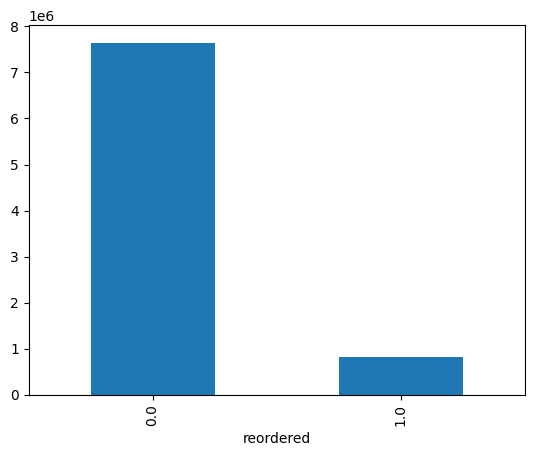

In [68]:
train_orders_merged_df['reordered'].value_counts().plot(kind='bar')

## create test dataset

In [14]:
#get test order details

order_details_test = orders[orders['eval_set'] == 'test']
order_details_test.drop(['eval_set'], axis = 1, inplace = True)
# merge on user_product features, to get features on this order

test_orders_merge_df = pd.merge(order_details_test, user_product_features, on = ['user_id'], how = 'outer')
test_orders_merge_df.dropna(inplace =True)
test_orders_merge_df = pd.merge(test_orders_merge_df, user_features, on = ['user_id'])
test_orders_merge_df = pd.merge(test_orders_merge_df, product_features, on = ['product_id'])

/tmp/ipykernel_30/2166952018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_details_test.drop(['eval_set'], axis = 1, inplace = True)


# Model Training

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Split data
X = train_orders_merged_df.drop(columns=['reordered', 'user_id', 'product_id', 'order_id'])  # Features
y = train_orders_merged_df['reordered']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test_scaled = scaler.transform(X_test)  # Only transform on the test set (to prevent data leakage)


In [71]:
# Decision Tree
import time
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42) #max_depth=5, 
time_t = time.time()

dt_model.fit(X_train_scaled, y_train)
time_te = time.time() - time_t
print("time for training - ", time_te)

time_t = time.time()
y_pred_dt = dt_model.predict(X_test_scaled)

time_tf = time.time() - time_t
print("time for testing - ", time_tf)
print("Decision Tree - Basic Model")
print(classification_report(y_test, y_pred_dt))


time for training -  400.57438611984253
time for testing -  1.9311277866363525
Decision Tree - Basic Model
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92   1529168
         1.0       0.27      0.30      0.28    165765

    accuracy                           0.85   1694933
   macro avg       0.60      0.61      0.60   1694933
weighted avg       0.86      0.85      0.86   1694933



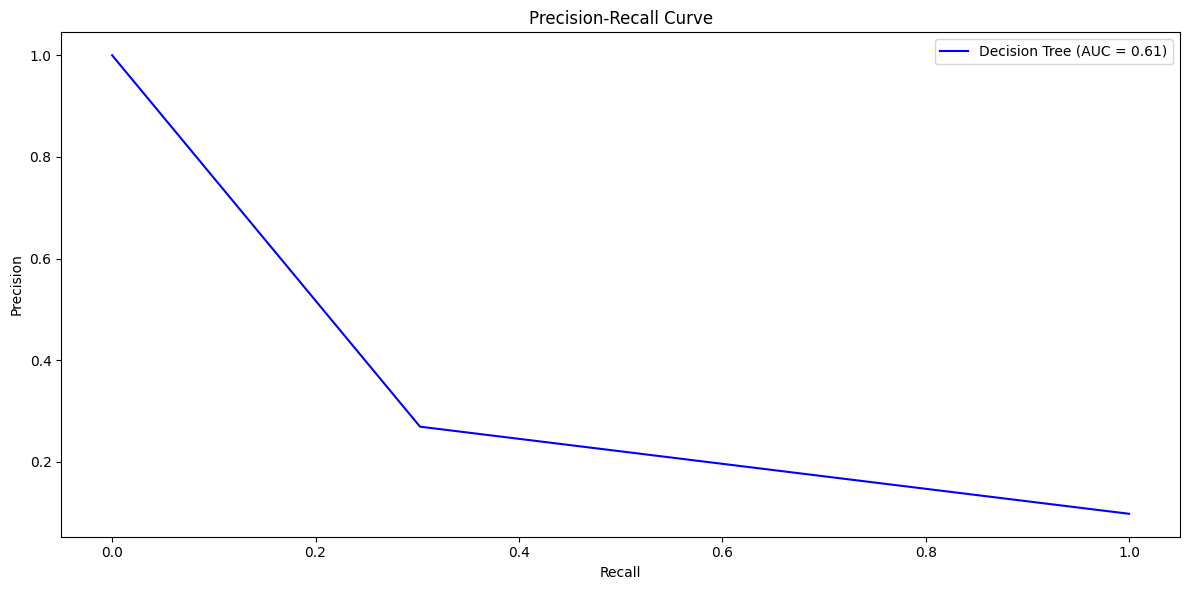

In [72]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Initialize lists to store metric values for plotting Precision-Recall and ROC curves
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_dt)


fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)

roc_auc_dt = auc(fpr_dt, tpr_dt)

# Create subplots for Precision-Recall and ROC curves
plt.figure(figsize=(12, 6))
plt.plot(recall_dt, precision_dt, color='blue', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# Show plots
plt.tight_layout()
plt.show()


# Create and train the Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
time_t = time.time()
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train_scaled, y_train)
time_te = time.time() - time_t
print("time for training - ", time_te)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show more detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

In [ ]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

roc_auc_rf = auc(fpr_rf, tpr_rf)

# Create subplots for Precision-Recall and ROC curves
plt.figure(figsize=(12, 6))
plt.plot(recall_rf, precision_rf, color='blue', label=f'Random Forest(AUC = {roc_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# Show plots
plt.tight_layout()
plt.show()


## logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = logreg_model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9054995094201364
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95   1529168
         1.0       0.64      0.08      0.14    165765

    accuracy                           0.91   1694933
   macro avg       0.77      0.54      0.54   1694933
weighted avg       0.88      0.91      0.87   1694933



In [31]:
from sklearn.linear_model import LogisticRegression

logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, class_weight='balanced', max_iter=1000)  # L1 regularization (Lasso)
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.01, class_weight='balanced', max_iter=1000)  # L2 regularization (Ridge)
logreg_l1.fit(X_train_scaled, y_train)
logreg_l2.fit(X_train_scaled, y_train)


# Predict and evaluate
y_pred_l1 = logreg_l1.predict(X_test_scaled)
y_pred_l2 = logreg_l2.predict(X_test_scaled)
print(f'Accuracy for l1 regularization: {accuracy_score(y_test, y_pred_l1)}')
print(f'Accuracy for l2 regularization: {accuracy_score(y_test, y_pred_l2)}')

print(classification_report(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l2))

Accuracy for l1 regularization: 0.7324354414009285
Accuracy for l2 regularization: 0.7324501912464977
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83   1529168
         1.0       0.23      0.75      0.35    165765

    accuracy                           0.73   1694933
   macro avg       0.60      0.74      0.59   1694933
weighted avg       0.89      0.73      0.78   1694933

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83   1529168
         1.0       0.23      0.75      0.35    165765

    accuracy                           0.73   1694933
   macro avg       0.60      0.74      0.59   1694933
weighted avg       0.89      0.73      0.78   1694933



In [25]:
import numpy as np

# Compare the coefficients of both models
print("L1 Coefficients: ", logreg_l1.coef_)
print("L2 Coefficients: ", logreg_l2.coef_)

# Check if sparsity is observed in L1
print("Non-zero coefficients for L1: ", np.sum(logreg_l1.coef_ != 0))

# Check if coefficients are shrunk but not eliminated in L2
print("Non-zero coefficients for L2: ", np.sum(logreg_l2.coef_ != 0))


L1 Coefficients:  [[ 0.25460246  0.43461611 -0.08502812 -1.38859932  0.13033341 -0.30852192
   0.05060202  0.30648292  0.01159017 -0.00529418  0.35040778  0.0025944
   0.00156638  0.00532666 -0.0057088  -0.00169407 -0.02417103  0.05118828
  -0.01359151 -0.01737324 -0.01466744 -0.01633826]]
L2 Coefficients:  [[ 0.25471288  0.4345834  -0.08525092 -1.3882273   0.13030308 -0.3092818
   0.05135193  0.30670102  0.01184722 -0.00543151  0.35049837  0.00285099
   0.00167025  0.00542489 -0.00575745 -0.00175598 -0.02428708  0.05192113
  -0.0142864  -0.01744684 -0.01475422 -0.01654645]]
Non-zero coefficients for L1:  22
Non-zero coefficients for L2:  22


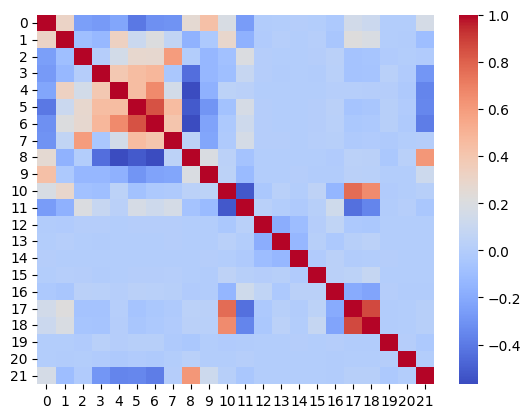

In [26]:
corr_matrix = np.corrcoef(X_train_scaled.T)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()


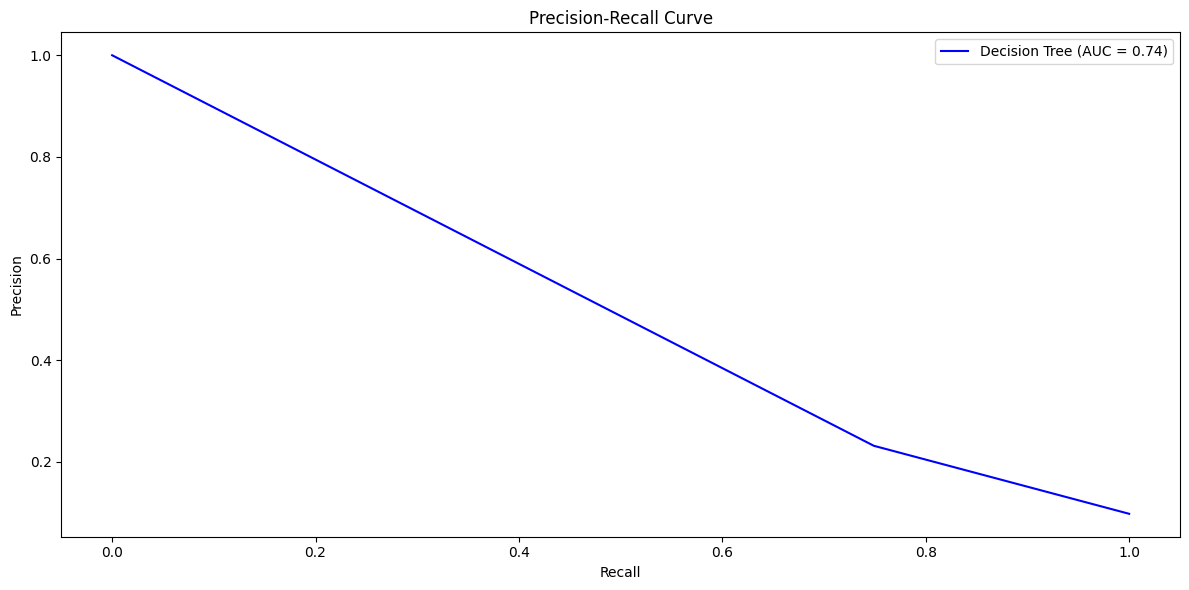

In [32]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Initialize lists to store metric values for plotting Precision-Recall and ROC curves
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_l2)


fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_l2)

roc_auc_dt = auc(fpr_dt, tpr_dt)

# Create subplots for Precision-Recall and ROC curves
plt.figure(figsize=(12, 6))
plt.plot(recall_dt, precision_dt, color='blue', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# Show plots
plt.tight_layout()
plt.show()

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train the logistic regression with l1 penalty model on the resampled data
logreg_model_smote = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, class_weight='balanced', max_iter=1000)  # L1 regularization (Lasso)
logreg_model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate the model
y_pred_smote = logreg_model_smote.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_smote)}')
print(classification_report(y_test, y_pred_smote))


Accuracy: 0.7311911444287178
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83   1529168
         1.0       0.23      0.75      0.35    165765

    accuracy                           0.73   1694933
   macro avg       0.60      0.74      0.59   1694933
weighted avg       0.89      0.73      0.78   1694933



In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Assuming logreg_l1 and logreg_l2 are already trained
# Predict probabilities once for each model
y_pred_smote = logreg_model_smote.predict_proba(X_test_scaled)[:, 1]

# Define the threshold range
thresholds = np.linspace(0.6, 0.8, 9)  # or np.arange(0.1, 1.0, 0.1)

# Loop over the thresholds
for threshold_value in thresholds:
    # Adjust the decision boundary based on the threshold
    y_pred_adjusted_l1 = (y_pred_smote >= threshold_value).astype(int)

    
    # L1 Regularization results
    print(f"Threshold: {threshold_value:.3f} - L1 Regularization")
    print(f'Accuracy: {accuracy_score(y_test, y_pred_adjusted_l1):.4f}')
    print(classification_report(y_test, y_pred_adjusted_l1))
    

Threshold: 0.600 - L1 Regularization
Accuracy: 0.8075
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89   1529168
         1.0       0.28      0.63      0.39    165765

    accuracy                           0.81   1694933
   macro avg       0.62      0.73      0.64   1694933
weighted avg       0.89      0.81      0.84   1694933

Threshold: 0.625 - L1 Regularization
Accuracy: 0.8221
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90   1529168
         1.0       0.30      0.60      0.40    165765

    accuracy                           0.82   1694933
   macro avg       0.62      0.72      0.65   1694933
weighted avg       0.89      0.82      0.85   1694933

Threshold: 0.650 - L1 Regularization
Accuracy: 0.8357
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90   1529168
         1.0       0.31      0.57      0.41    165765

    accuracy        